In [1]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

NameError: name 'pd' is not defined

In [2]:
import pandas as pd

In [5]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
#importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [8]:
%matplotlib inline

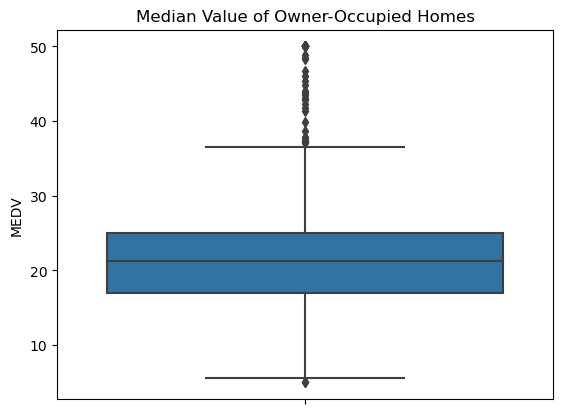

In [9]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.title("Median Value of Owner-Occupied Homes");

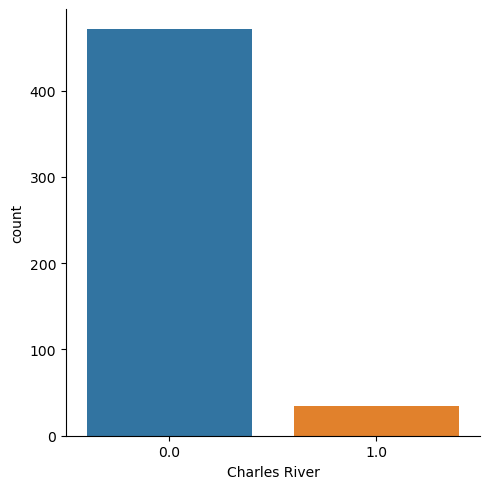

In [10]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.xlabel("Charles River");

In [11]:
boston_df.loc[(boston_df.AGE <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[((boston_df.AGE > 35)&(boston_df.AGE < 70)), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df.AGE >= 70), 'age_group'] = '70 years and older'

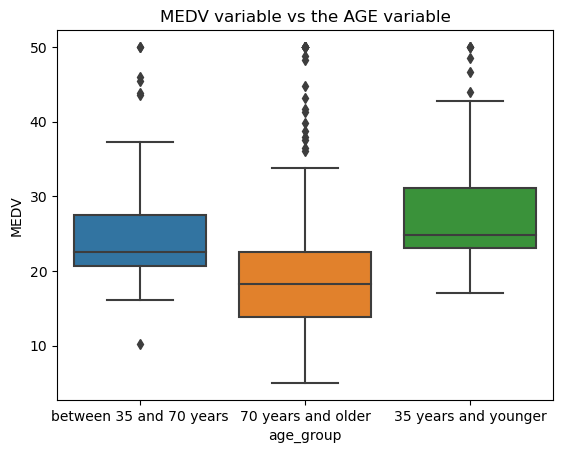

In [14]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title("MEDV variable vs the AGE variable")
plt.ylabel("MEDV");

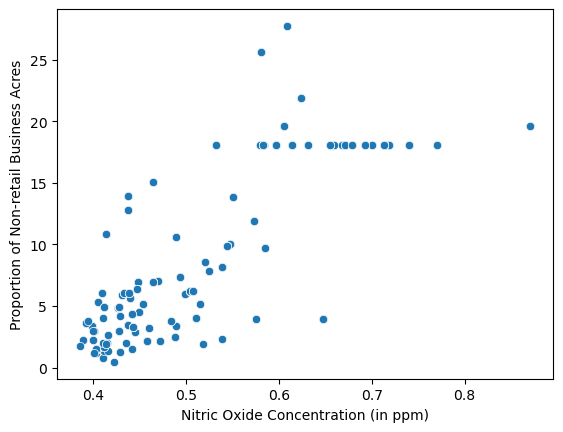

In [15]:
ax = sns.scatterplot(y='INDUS', x='NOX', data=boston_df)
plt.xlabel("Nitric Oxide Concentration (in ppm)")
plt.ylabel("Proportion of Non-retail Business Acres");

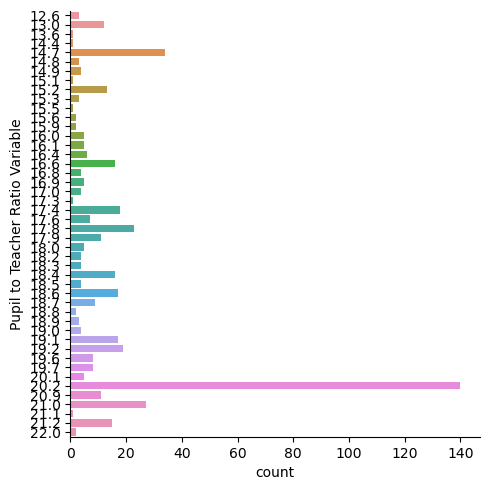

In [16]:
sns.catplot(y="PTRATIO", kind="count", data=boston_df)
plt.ylabel("Pupil to Teacher Ratio Variable");

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


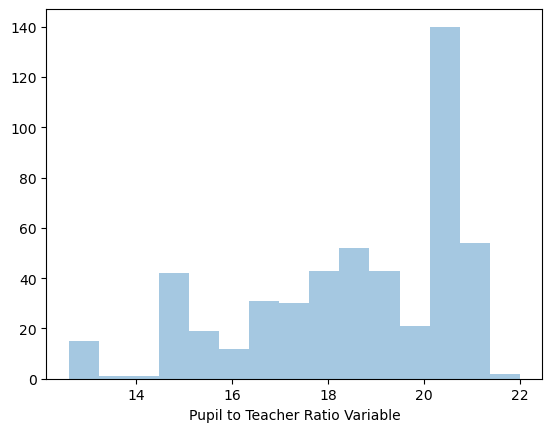

In [17]:
# Distribution plot
sns.distplot(boston_df.PTRATIO, kde=False, bins=15)
plt.xlabel("Pupil to Teacher Ratio Variable");

In [18]:
import scipy.stats

In [19]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV,
                     boston_df[boston_df.CHAS == 0].MEDV)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [20]:
boston_df.loc[(boston_df.AGE > 81), 'age_span'] = 'before 1940'
boston_df.loc[(boston_df.AGE <= 81), 'age_span'] = 'after 1940'

In [21]:
scipy.stats.levene(boston_df[boston_df.age_span=='before 1940']['MEDV'],
                  boston_df[boston_df.age_span=='after 1940']['MEDV'],
                  center='mean')

LeveneResult(statistic=1.587082228964904, pvalue=0.2083265383143275)

In [22]:
scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)

(0.7636514469209151, 7.913361061238693e-98)

In [23]:
import statsmodels.api as sm

In [24]:
X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        03:11:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""